<img src="sp.jpg" />

# Análise exploratória de dados (EDA) sobre Roubo de veículos no Estado de São Paulo
Período: 01/01/2022 - 31/08/2022 <br />
Origem de dados: <a href="http://www.ssp.sp.gov.br/transparenciassp/Consulta.aspx" target="_blank">Portal de transparência da Segurança Pública do Estado de São Paulo</a>

<div id="topo"></div>

<div class="alert alert-info">
    <h2>Índice</h2>
    <h3><a href="#1">1. Objetivo</a></h3>
    <h3><a href="#2">2. Importação de bibliotecas e upload de datases</a></h3>
    <h3><a href="#3">3. Feature Engineering</a></h3>
    <h3><a href="#4">4. EDA</a></h3>
    <h3><a href="#5">5. Descobertas</a></h3>
    <h3><a href="#6">6. Visualizando locais de roubos em Guarulhos</a></h3>
    <h3><a href="#7">7. Mapa de calor de roubos de carros no Estado de SP</a></h3>
</div>

***
<div id="1"></div>

# 1. Objetivo
O objetivo desse estudo é entender aonde acontecem roubos de veículos no Estado de São Paulo e suas variáveis como:
    <ul>
    <li>Dia da semana</li>
    <li>Marcas e modelos</li>
    <li>Tipo de local</li>
    <li>Vítimas fatais</li>
    <li>Período dos roubos</li>
    <li>Etc</li>
    </ul>

***
<div id="2"></div>

<h4><a href="#topo">>> Voltar para o índice</a></h4>

## 2. Importação de bibliotecas e upload de datasets

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
janeiro = pd.read_csv('Copy of DadosBO_2022_1(ROUBO DE VEÍCULOS).csv', encoding = 'latin-1', on_bad_lines="skip", sep = ";", engine= 'python')
fevereiro = pd.read_csv('Copy of DadosBO_2022_2(ROUBO DE VEÍCULOS).csv', encoding = 'latin-1', on_bad_lines="skip", sep = ";", engine= 'python')
marco = pd.read_csv('Copy of DadosBO_2022_3(ROUBO DE VEÍCULOS).csv', encoding = 'latin-1', on_bad_lines="skip", sep = ";", engine= 'python')
abril = pd.read_csv('DadosBO_2022_4(ROUBO DE VEÍCULOS).csv', encoding = 'latin-1', on_bad_lines="skip", sep = ";", engine= 'python')
maio = pd.read_csv('CSVDadosBO_2022_8(ROUBO DE VEÍCULOS).csv', encoding = 'latin-1', on_bad_lines="skip", sep = ";", engine= 'python')
junho = pd.read_csv('CSVJunho.csv',on_bad_lines="skip",encoding = 'latin-1', sep = ";", engine= 'python')
julho = pd.read_csv('CSVJulho.csv',on_bad_lines="skip",encoding = 'latin-1', sep = ";", engine= 'python')
agosto = pd.read_csv('CSVAgosto.csv',on_bad_lines="skip",encoding = 'latin-1', sep = ";", engine= 'python')

In [6]:
print(janeiro.shape)
print(fevereiro.shape)
print(marco.shape)
print(abril.shape)
print(maio.shape)
print(junho.shape)
print(julho.shape)
print(agosto.shape)

(6862, 54)
(6184, 54)
(8744, 54)
(8618, 54)
(10174, 54)
(10503, 54)
(9168, 54)
(10174, 54)


### 2.1 Concatenação de datasets em df

In [7]:
df = pd.concat([janeiro, fevereiro, marco, abril, maio, junho, julho, agosto], axis=0)

In [8]:
df.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2022,1,Jan-22,01/01/22 00:04,01/01/22 00:30,31/12/21,22:30,A NOITE,01/01/22,01/01/22 00:04,...,LKN4215,SP,S.PAULO,Preta,I/PEUGEOT 307 16 PR PK,2007.0,2008.0,AUTOMOVEL,NaN,NaN
1,2021,2528472,2528472/2021,01/01/22 00:34,01/01/22 00:34,31/12/21,22:20,A NOITE,31/12/21,01/01/22 00:34,...,BWB4710,SP,SÃO PAULO,Branco,FORD/KA SE 1.0 HA C,2019.0,NaN,AUTOMOVEL,NaN,NaN
2,2022,1,Jan-22,01/01/22 00:32,01/01/22 00:41,31/12/21,23:34,A NOITE,01/01/22,01/01/22 00:32,...,FOQ8F35,SP,BARUERI,Preta,JEEP/COMPASS LIMITED F,2016.0,2017.0,CAMIONETA,NaN,NaN
3,2022,2,Feb-22,01/01/22 00:41,01/01/22 00:41,31/12/21,21:50,A NOITE,01/01/22,01/01/22 00:41,...,DZI7987,SP,FERRAZ DE VASCONCELO,Prata,I/HYUNDAI TUCSON GL 20L,2007.0,NaN,AUTOMOVEL,NaN,NaN
4,2022,11,Nov-22,01/01/22 00:45,01/01/22 00:45,31/12/21,22:30,A NOITE,01/01/22,01/01/22 00:45,...,GGI4715,SP,SANTO ANDRÉ,Prata,HONDA/FIT LX CVT,2017.0,NaN,AUTOMOVEL,NaN,NaN


In [9]:
df.shape

(70427, 54)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70427 entries, 0 to 10173
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ANO_BO                    70427 non-null  int64  
 1   NUM_BO                    70427 non-null  int64  
 2   NUMERO_BOLETIM            70427 non-null  object 
 3   BO_INICIADO               70427 non-null  object 
 4   BO_EMITIDO                70427 non-null  object 
 5   DATAOCORRENCIA            70427 non-null  object 
 6   HORAOCORRENCIA            67703 non-null  object 
 7   PERIDOOCORRENCIA          70427 non-null  object 
 8   DATACOMUNICACAO           70427 non-null  object 
 9   DATAELABORACAO            70427 non-null  object 
 10  BO_AUTORIA                70427 non-null  object 
 11  FLAGRANTE                 70427 non-null  object 
 12  NUMERO_BOLETIM_PRINCIPAL  22106 non-null  object 
 13  LOGRADOURO                66726 non-null  object 
 14  NUMERO

### 2.2 Remoção de itens duplicados

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
df.shape

(60253, 54)

### 2.3 Drop de features menos relevantes para o estudo

In [13]:
df = df.drop(columns = {'NUM_BO',
                        'NUMERO_BOLETIM',
                        'BO_INICIADO',
                        'SOLUCAO',
                        'DATAELABORACAO',
                        'PLACA_VEICULO',
                        'BO_AUTORIA',
                        'NUMERO_BOLETIM_PRINCIPAL',
                        'BO_AUTORIA',
                        'PARENTESCO',
                        'QUANT_CELULAR',
                        'MARCA_CELULAR',
                        'UF_VEICULO',
                        'NATUREZAVINCULADA',
                        'TIPOVINCULO',
                        'RELACIONAMENTO',
                        'PROFISSAO',
                        'GRAUINSTRUCAO',
                        'CORCUTIS',
                        'DATANASCIMENTO',
                        'NUMERO',
                        'IDADE',
                        'ESTADOCIVIL',
                        'NATURALIDADE',
                        'NACIONALIDADE',
                        'TIPOPESSOA',
                        'DELEGACIA_NOME',
                        'DELEGACIA_CIRCUNSCRICAO',
                        'DESDOBRAMENTO',
                        'ESPECIE',
                        'EXAME',
                        'RUBRICA',
                        'BO_EMITIDO',
                        'UF',
                        'ANO_BO',
                        'SEXO'})

***
<div id="3"></div>

<h4><a href="#topo">>> Voltar para o índice</a></h4>

## 3. Feature Engineering

### 3.1 Substituição de valores nulos por 'não' em VITIMAFATAL

In [14]:
df['VITIMAFATAL'].isnull().sum()

59769

In [15]:
df['VITIMAFATAL'].fillna("Não", inplace=True)

In [16]:
df['VITIMAFATAL'].isnull().sum()

0

In [17]:
vitima_fatal = df['VITIMAFATAL'].value_counts()
print(vitima_fatal)

Não    59769
Sim      484
Name: VITIMAFATAL, dtype: int64


### 3.2 Padronização de nomes de locais

In [18]:
df['DESCRICAOLOCAL'] = df['DESCRICAOLOCAL'].str.replace('Via Pública', 'Via pública')

In [19]:
local = df.groupby(['DESCRICAOLOCAL']).size().sort_values(ascending=False)
print(local)

DESCRICAOLOCAL
Via pública                        49658
Residência                          2502
Rodovia/Estrada                     2379
Comércio e serviços                 1790
Veículo em movimento                 960
Unidade rural                        562
Garagem ou abrigo de residência      345
Centro Comerc./Empresarial           298
Condominio Residencial               234
Restaurante e afins                  218
Area não ocupada                     180
Outros                               133
Estacionamento particular            117
Repartição Pública                   109
Terminal/Estação                      80
Serviços e bens públicos              77
Escritório                            77
Condominio Comercial                  73
Saúde                                 69
Estacionamento público                65
Favela                                46
Shopping Center                       42
Estabelecimento de ensino             42
Garagem coletiva de prédio            32
E

### 3.3 Correção de valores de Ano_modelo e Ano_fabricacao que são 0.0

In [20]:
media_fabr = df.loc[df['ANO_MODELO'] != 0].mean()
print(media_fabr)

ANO_FABRICACAO    2013.966678
ANO_MODELO        2014.291491
dtype: float64


In [21]:
df['ANO_MODELO'].loc[(df['ANO_MODELO'] < 1900)] = 2014
df['ANO_FABRICACAO'].loc[(df['ANO_FABRICACAO'] < 1900)] = 2014

In [22]:
df

,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,FLAGRANTE,LOGRADOURO,BAIRRO,CIDADE,LATITUDE,LONGITUDE,DESCRICAOLOCAL,STATUS,VITIMAFATAL,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO
0,31/12/21,22:30,A NOITE,01/01/22,Não,RUA PADRE PEDRO ROTA,SAO LUCAS,S.PAULO,"-23,59209496","-46,55141693",Via pública,Consumado,Não,S.PAULO,Preta,I/PEUGEOT 307 16 PR PK,2007.0,2008.0,AUTOMOVEL
1,31/12/21,22:20,A NOITE,31/12/21,Não,RUA ERVA BOTÃO,JARDIM DOS IPES,S.PAULO,"-23,5025919","-46,4147227",Outros,Consumado,Não,SÃO PAULO,Branco,FORD/KA SE 1.0 HA C,2019.0,NaN,AUTOMOVEL
2,31/12/21,23:34,A NOITE,01/01/22,Não,AVENIDA VITÓRIO FORNAZARO,VILA SUL AMERICANA,CARAPICUIBA,"-23,52081313","-46,85795918",Via pública,Consumado,Não,BARUERI,Preta,JEEP/COMPASS LIMITED F,2016.0,2017.0,CAMIONETA
3,31/12/21,21:50,A NOITE,01/01/22,Não,RUA ANTONIO DE CAMARGO ORTIS,ITAIM PAULISTA,S.PAULO,"-23,49922786","-46,37923756",Via pública,Consumado,Não,FERRAZ DE VASCONCELO,Prata,I/HYUNDAI TUCSON GL 20L,2007.0,NaN,AUTOMOVEL
4,31/12/21,22:30,A NOITE,01/01/22,Não,RUA JOSÉ BASÍLIO DA GAMA,INDEPENDÊNCIA,S.BERNARDO DO CAMPO,NaN,NaN,Via pública,Consumado,Não,SANTO ANDRÉ,Prata,HONDA/FIT LX CVT,2017.0,NaN,AUTOMOVEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,31/07/22,06:00,PELA MANHÃ,31/07/22,Não,RUA CONCEICAO DE IPANEMA,RAPOSO TAVARES,S.PAULO,"-23,5982573","-46,76687462",Via pública,Consumado,Não,NaN,NaN,NaN,2014.0,2014.0,NaN
9164,31/07/22,06:00,PELA MANHÃ,31/07/22,Não,RUA CONCEICAO DE IPANEMA,RAPOSO TAVARES,S.PAULO,"-23,5982573","-46,76687462",Via pública,Consumado,Não,TABOAO DA SERRA,Cinza,I/HYUNDAI TUCSON GL 20L,2014.0,2015.0,CAMIONETA
9165,31/07/22,06:00,PELA MANHÃ,31/07/22,Não,RUA CONCEICAO DE IPANEMA,RAPOSO TAVARES,S.PAULO,"-23,5982573","-46,76687462",Via pública,Consumado,Não,NaN,NaN,NaN,2014.0,2014.0,NaN
9166,31/07/22,06:00,PELA MANHÃ,31/07/22,Não,RUA CONCEICAO DE IPANEMA,RAPOSO TAVARES,S.PAULO,"-23,5982573","-46,76687462",Via pública,Consumado,Não,TABOAO DA SERRA,Cinza,I/HYUNDAI TUCSON GL 20L,2014.0,2015.0,CAMIONETA


In [23]:
df['ANO_MODELO'].describe()

count    52686.000000
mean      2014.262840
std          5.848744
min       1968.000000
25%       2014.000000
50%       2014.000000
75%       2018.000000
max       2023.000000
Name: ANO_MODELO, dtype: float64

In [24]:
df['ANO_FABRICACAO'].describe()

count    59314.000000
mean      2014.067994
std          5.795783
min       1968.000000
25%       2013.000000
50%       2014.000000
75%       2018.000000
max       2022.000000
Name: ANO_FABRICACAO, dtype: float64

In [25]:
df.isnull().sum()

DATAOCORRENCIA             0
HORAOCORRENCIA          2330
PERIDOOCORRENCIA           0
DATACOMUNICACAO            0
FLAGRANTE                  0
LOGRADOURO              3208
BAIRRO                  1517
CIDADE                    47
LATITUDE                4480
LONGITUDE               4480
DESCRICAOLOCAL             0
STATUS                     0
VITIMAFATAL                0
CIDADE_VEICULO         17874
DESCR_COR_VEICULO      17794
DESCR_MARCA_VEICULO    17753
ANO_FABRICACAO           939
ANO_MODELO              7567
DESCR_TIPO_VEICULO     17774
dtype: int64

### 3.4 Inserção de média de 2014 em valores nulos de ano fabricação e ano modelo

In [26]:
df['ANO_FABRICACAO'].fillna(2014, inplace=True)
df['ANO_MODELO'].fillna(2014, inplace=True)

In [27]:
df.isnull().sum()

DATAOCORRENCIA             0
HORAOCORRENCIA          2330
PERIDOOCORRENCIA           0
DATACOMUNICACAO            0
FLAGRANTE                  0
LOGRADOURO              3208
BAIRRO                  1517
CIDADE                    47
LATITUDE                4480
LONGITUDE               4480
DESCRICAOLOCAL             0
STATUS                     0
VITIMAFATAL                0
CIDADE_VEICULO         17874
DESCR_COR_VEICULO      17794
DESCR_MARCA_VEICULO    17753
ANO_FABRICACAO             0
ANO_MODELO                 0
DESCR_TIPO_VEICULO     17774
dtype: int64

### 3.5 Drop de valores nulos

In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

DATAOCORRENCIA         0
HORAOCORRENCIA         0
PERIDOOCORRENCIA       0
DATACOMUNICACAO        0
FLAGRANTE              0
LOGRADOURO             0
BAIRRO                 0
CIDADE                 0
LATITUDE               0
LONGITUDE              0
DESCRICAOLOCAL         0
STATUS                 0
VITIMAFATAL            0
CIDADE_VEICULO         0
DESCR_COR_VEICULO      0
DESCR_MARCA_VEICULO    0
ANO_FABRICACAO         0
ANO_MODELO             0
DESCR_TIPO_VEICULO     0
dtype: int64

In [30]:
df.shape

(36629, 19)

### 3.6 Tratamento de Marca e Modelo de veículos

In [31]:
df['DESCR_MARCA_VEICULO'].value_counts()

HONDA/CG 160 FAN            998
HONDA/CG 160 TITAN          474
YAMAHA/FZ25 FAZER           447
HONDA/CG 160 START          403
HYUNDAI/HB20 1.0M COMFOR    257
                           ... 
VW/NOVO GOL CITY MCV          1
I/CITROEN C4 PIC SX A 5L      1
PEUGEOT/206 16 FELINE         1
CITROEN/PICASSO 16 GLX        1
I/SUZUKI GSX750F              1
Name: DESCR_MARCA_VEICULO, Length: 3496, dtype: int64

In [32]:
df[['MARCA', 'MODELO','item1','item2','item3','item4']] = df['DESCR_MARCA_VEICULO'].str.split(' ', expand=True)

In [33]:
df = df.drop(columns = {'DESCR_MARCA_VEICULO','item1','item2','item3','item4'})

In [34]:
df['MARCA'] = df['MARCA'].str.replace('I/','')
df['MARCA'] = df['MARCA'].str.split('/').str[0]

In [35]:
df

,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,FLAGRANTE,LOGRADOURO,BAIRRO,CIDADE,LATITUDE,LONGITUDE,DESCRICAOLOCAL,STATUS,VITIMAFATAL,CIDADE_VEICULO,DESCR_COR_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,MARCA,MODELO
0,31/12/21,22:30,A NOITE,01/01/22,Não,RUA PADRE PEDRO ROTA,SAO LUCAS,S.PAULO,"-23,59209496","-46,55141693",Via pública,Consumado,Não,S.PAULO,Preta,2007.0,2008.0,AUTOMOVEL,PEUGEOT,307
1,31/12/21,22:20,A NOITE,31/12/21,Não,RUA ERVA BOTÃO,JARDIM DOS IPES,S.PAULO,"-23,5025919","-46,4147227",Outros,Consumado,Não,SÃO PAULO,Branco,2019.0,2014.0,AUTOMOVEL,FORD,SE
2,31/12/21,23:34,A NOITE,01/01/22,Não,AVENIDA VITÓRIO FORNAZARO,VILA SUL AMERICANA,CARAPICUIBA,"-23,52081313","-46,85795918",Via pública,Consumado,Não,BARUERI,Preta,2016.0,2017.0,CAMIONETA,JEEP,LIMITED
3,31/12/21,21:50,A NOITE,01/01/22,Não,RUA ANTONIO DE CAMARGO ORTIS,ITAIM PAULISTA,S.PAULO,"-23,49922786","-46,37923756",Via pública,Consumado,Não,FERRAZ DE VASCONCELO,Prata,2007.0,2014.0,AUTOMOVEL,HYUNDAI,TUCSON
5,31/12/21,23:30,A NOITE,01/01/22,Não,AVENIDA SAPOPEMBA,SAPOPEMBA,S.PAULO,"-23,6101801","-46,48495483",Via pública,Consumado,Não,S.PAULO,Vermelho,2001.0,2001.0,AUTOMOVEL,FIAT,ELX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9161,31/07/22,18:00,A NOITE,31/07/22,Não,RUA PRESIDENTE JOÃO CAFÉ FILHO,PARQUE SÃO VICENTE,MAUA,"-23,66790901","-46,47875581",Via pública,Consumado,Não,BELO HORIZONTE,Branco,2020.0,2021.0,AUTOMOVEL,CHEVROLET,10MT
9162,31/07/22,06:00,PELA MANHÃ,31/07/22,Não,RUA CONCEICAO DE IPANEMA,RAPOSO TAVARES,S.PAULO,"-23,5982573","-46,76687462",Via pública,Consumado,Não,TABOAO DA SERRA,Cinza,2014.0,2015.0,CAMIONETA,HYUNDAI,TUCSON
9164,31/07/22,06:00,PELA MANHÃ,31/07/22,Não,RUA CONCEICAO DE IPANEMA,RAPOSO TAVARES,S.PAULO,"-23,5982573","-46,76687462",Via pública,Consumado,Não,TABOAO DA SERRA,Cinza,2014.0,2015.0,CAMIONETA,HYUNDAI,TUCSON
9166,31/07/22,06:00,PELA MANHÃ,31/07/22,Não,RUA CONCEICAO DE IPANEMA,RAPOSO TAVARES,S.PAULO,"-23,5982573","-46,76687462",Via pública,Consumado,Não,TABOAO DA SERRA,Cinza,2014.0,2015.0,CAMIONETA,HYUNDAI,TUCSON


In [36]:
modelos = df.groupby('MODELO').size().sort_values(ascending = False)
print(modelos)

MODELO
160       2292
150        729
SR         670
SE         528
FAZER      521
          ... 
SX           1
CSL          1
SYMBOL       1
PRCTV        1
ICON         1
Length: 1346, dtype: int64


### 3.7 Inserção de valor 160 (mode) em valores nulos

In [37]:
df['MODELO'].fillna('160', inplace=True)

In [38]:
df['MODELO'].value_counts()

160                3292
150                 729
SR                  670
SE                  528
FAZER               521
                   ... 
MRE                   1
DAVIDSON/FLHTCU       1
CSL                   1
515CDISPRINTERM       1
R1250                 1
Name: MODELO, Length: 1346, dtype: int64

### 3.8 Replaces para otimizar Marcas

In [39]:
df['MARCA'].replace(to_replace=['CHEV'], value='CHEVROLET', inplace=True)
df['MARCA'].replace(to_replace=['HYUNDAHB20'], value='HYUNDAI', inplace=True)
df['MARCA'].replace(to_replace=['HYUNDAHB20S'], value='HYUNDAI', inplace=True)
df['MARCA'].replace(to_replace=['CAOACHERY'], value='CHERY', inplace=True)
df['MARCA'].replace(to_replace=['HYUNDATUCSON'], value='HYUNDAI', inplace=True)
df['MARCA'].replace(to_replace=['HYUNDAHR'], value='HYUNDAI', inplace=True)
df['MARCA'].replace(to_replace=['HYUNDAIX35'], value='HYUNDAI', inplace=True)
df['MARCA'].replace(to_replace=['HYUNDACRETA'], value='HYUNDAI', inplace=True)
df['MARCA'].replace(to_replace=['HYUNDAHB20X'], value='HYUNDAI', inplace=True)
df['MARCA'].replace(to_replace=['AUDA3'], value='AUDI', inplace=True)
df['MARCA'].replace(to_replace=['VW'], value='VOLKSWAGEN', inplace=True)

### 3.9 Criação de coluna mês e dia da semana

In [40]:
df['MÊS'] = pd.DatetimeIndex(df['DATACOMUNICACAO']).month

In [41]:
df['DIA_SEMANA'] = pd.DatetimeIndex(df['DATACOMUNICACAO']).dayofweek

In [42]:
df

,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,FLAGRANTE,LOGRADOURO,BAIRRO,CIDADE,LATITUDE,LONGITUDE,...,VITIMAFATAL,CIDADE_VEICULO,DESCR_COR_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,MARCA,MODELO,MÊS,DIA_SEMANA
0,31/12/21,22:30,A NOITE,01/01/22,Não,RUA PADRE PEDRO ROTA,SAO LUCAS,S.PAULO,"-23,59209496","-46,55141693",...,Não,S.PAULO,Preta,2007.0,2008.0,AUTOMOVEL,PEUGEOT,307,1,5
1,31/12/21,22:20,A NOITE,31/12/21,Não,RUA ERVA BOTÃO,JARDIM DOS IPES,S.PAULO,"-23,5025919","-46,4147227",...,Não,SÃO PAULO,Branco,2019.0,2014.0,AUTOMOVEL,FORD,SE,12,4
2,31/12/21,23:34,A NOITE,01/01/22,Não,AVENIDA VITÓRIO FORNAZARO,VILA SUL AMERICANA,CARAPICUIBA,"-23,52081313","-46,85795918",...,Não,BARUERI,Preta,2016.0,2017.0,CAMIONETA,JEEP,LIMITED,1,5
3,31/12/21,21:50,A NOITE,01/01/22,Não,RUA ANTONIO DE CAMARGO ORTIS,ITAIM PAULISTA,S.PAULO,"-23,49922786","-46,37923756",...,Não,FERRAZ DE VASCONCELO,Prata,2007.0,2014.0,AUTOMOVEL,HYUNDAI,TUCSON,1,5
5,31/12/21,23:30,A NOITE,01/01/22,Não,AVENIDA SAPOPEMBA,SAPOPEMBA,S.PAULO,"-23,6101801","-46,48495483",...,Não,S.PAULO,Vermelho,2001.0,2001.0,AUTOMOVEL,FIAT,ELX,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9161,31/07/22,18:00,A NOITE,31/07/22,Não,RUA PRESIDENTE JOÃO CAFÉ FILHO,PARQUE SÃO VICENTE,MAUA,"-23,66790901","-46,47875581",...,Não,BELO HORIZONTE,Branco,2020.0,2021.0,AUTOMOVEL,CHEVROLET,10MT,7,6
9162,31/07/22,06:00,PELA MANHÃ,31/07/22,Não,RUA CONCEICAO DE IPANEMA,RAPOSO TAVARES,S.PAULO,"-23,5982573","-46,76687462",...,Não,TABOAO DA SERRA,Cinza,2014.0,2015.0,CAMIONETA,HYUNDAI,TUCSON,7,6
9164,31/07/22,06:00,PELA MANHÃ,31/07/22,Não,RUA CONCEICAO DE IPANEMA,RAPOSO TAVARES,S.PAULO,"-23,5982573","-46,76687462",...,Não,TABOAO DA SERRA,Cinza,2014.0,2015.0,CAMIONETA,HYUNDAI,TUCSON,7,6
9166,31/07/22,06:00,PELA MANHÃ,31/07/22,Não,RUA CONCEICAO DE IPANEMA,RAPOSO TAVARES,S.PAULO,"-23,5982573","-46,76687462",...,Não,TABOAO DA SERRA,Cinza,2014.0,2015.0,CAMIONETA,HYUNDAI,TUCSON,7,6


In [43]:
df.drop(columns={'ANO_MODELO'},inplace=True)

In [44]:
### Replace de números para string no dia da semana
df['DIA_SEMANA'] = df['DIA_SEMANA'].astype(str)
df['DIA_SEMANA'] = df['DIA_SEMANA'].str.replace('0','Segunda')
df['DIA_SEMANA'] = df['DIA_SEMANA'].str.replace('1','Terça')
df['DIA_SEMANA'] = df['DIA_SEMANA'].str.replace('2','Quarta')
df['DIA_SEMANA'] = df['DIA_SEMANA'].str.replace('3','Quinta')
df['DIA_SEMANA'] = df['DIA_SEMANA'].str.replace('4','Sexta')
df['DIA_SEMANA'] = df['DIA_SEMANA'].str.replace('5','Sábado')
df['DIA_SEMANA'] = df['DIA_SEMANA'].str.replace('6','Domingo')

***
<div id="4"></div>

<h4><a href="#topo">>> Voltar para o índice</a></h4>

## 4. EDA

### 4.1 Wordcloud de marcas de veículos mais roubados

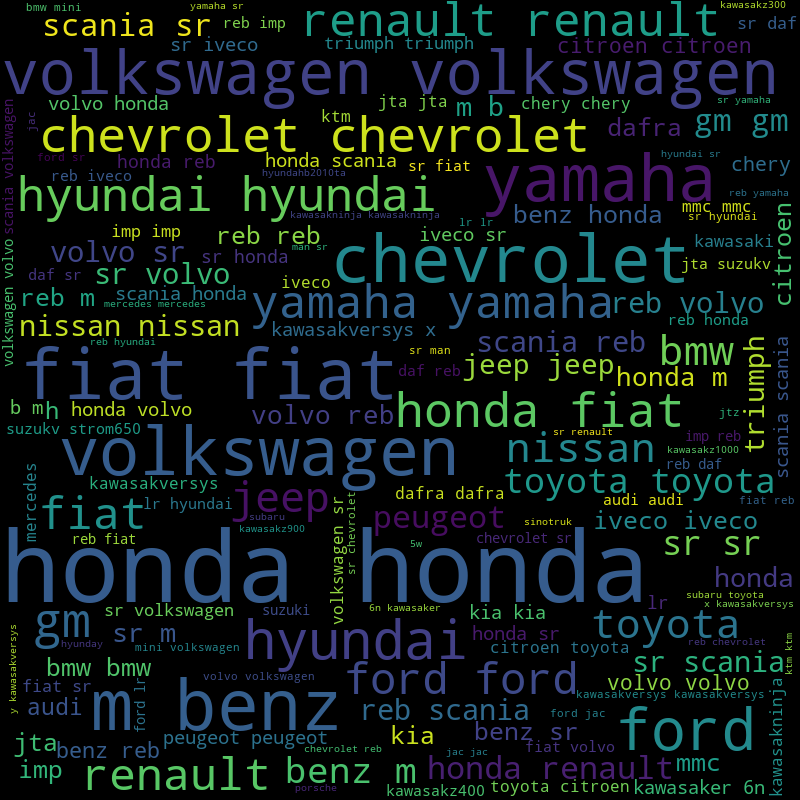

In [45]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

comment_words = ' '
stopwords = STOPWORDS.update([])

for val in df['MARCA'].values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
          
    for words in tokens: 
        if words == "nan":
            continue
        comment_words = comment_words + words + ' '

        
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
wordcloud.to_image()

In [46]:
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### 4.2 Gráficos de features categóricas

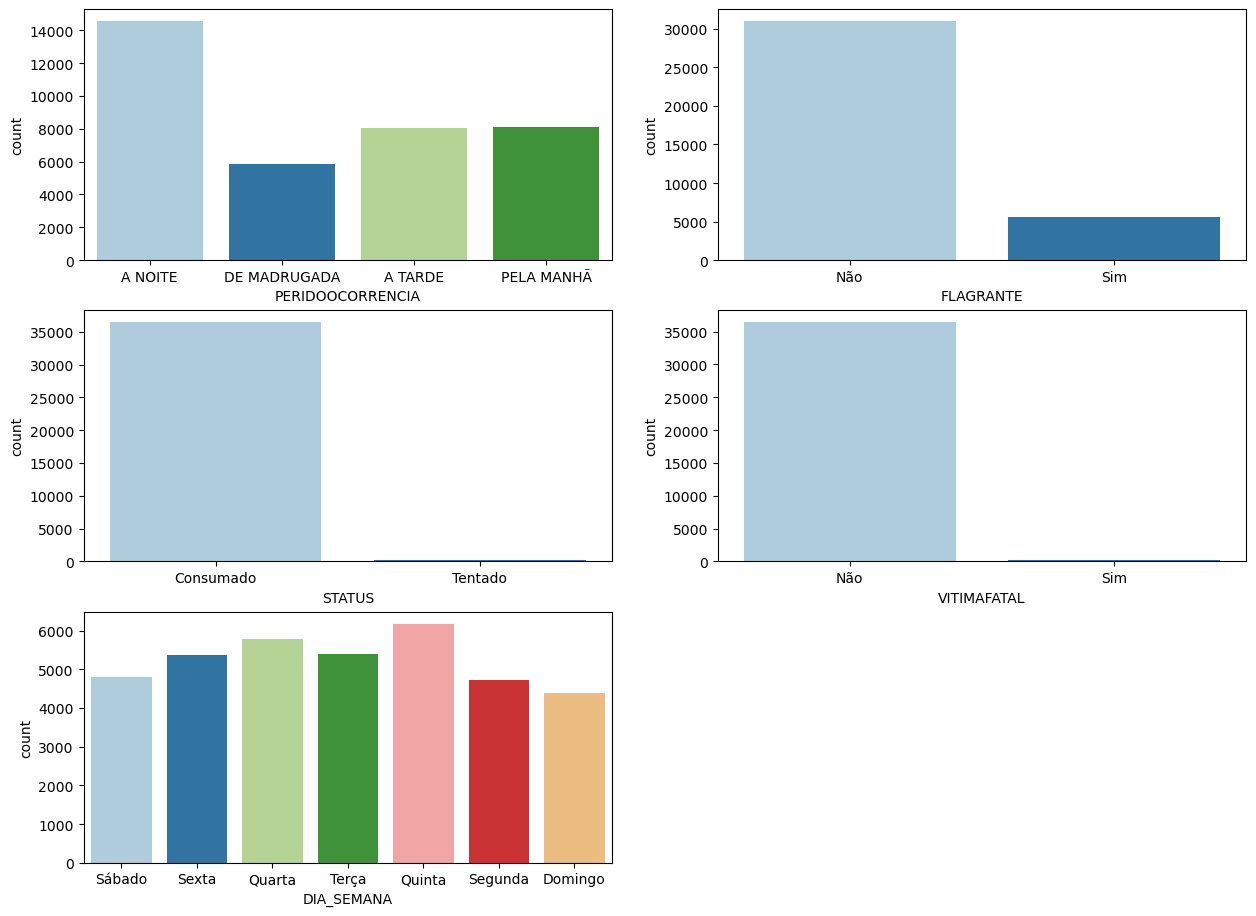

In [47]:
cores1 = "Paired"

fig = plt.figure(figsize=(15, 15))

fig.add_subplot(421)
sns.countplot(df['PERIDOOCORRENCIA'], palette = cores1)

fig.add_subplot(422)
sns.countplot(df['FLAGRANTE'], palette = cores1)

fig.add_subplot(423)
sns.countplot(df['STATUS'], palette = cores1)

fig.add_subplot(424)
sns.countplot(df['VITIMAFATAL'], palette = cores1)

fig.add_subplot(425)
sns.countplot(df['DIA_SEMANA'], palette = cores1)

plt.show()

### 4.3 Gráficos de features int/float

<AxesSubplot:xlabel='MÊS', ylabel='count'>

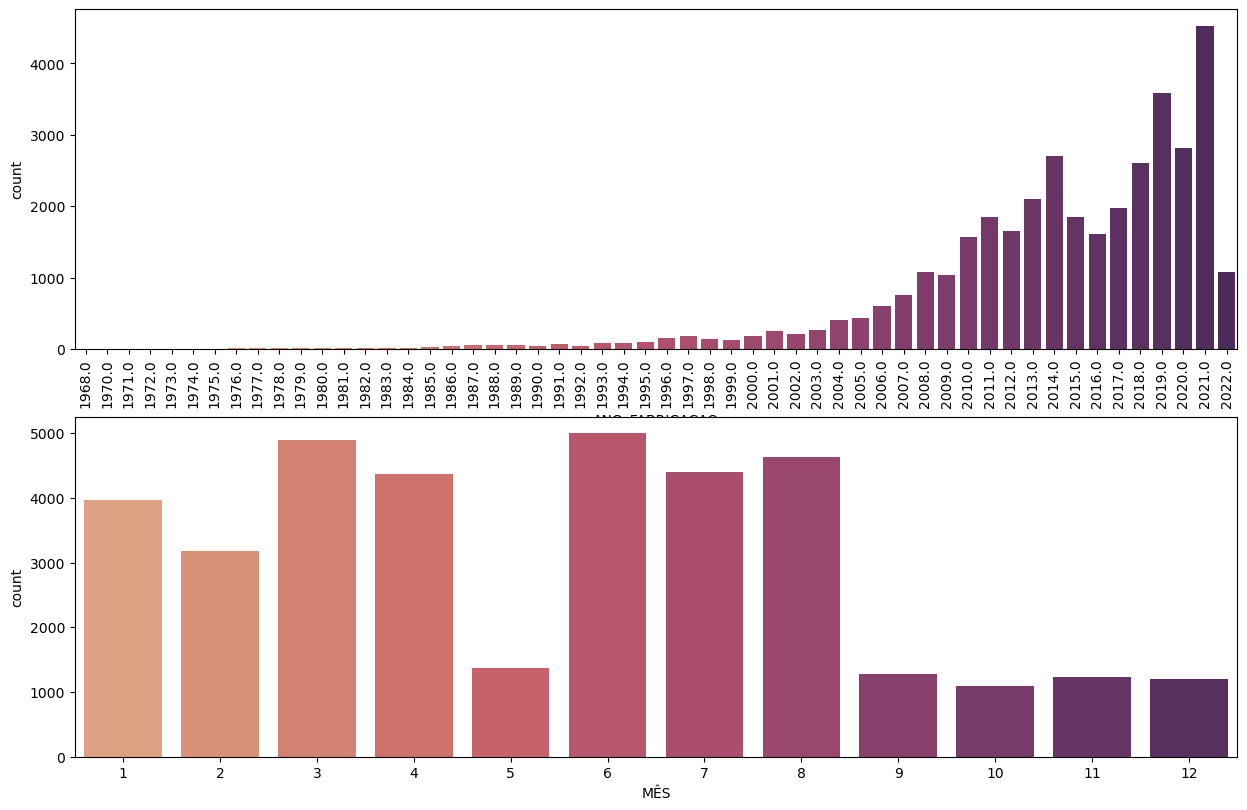

In [48]:
cores2 = "flare"

fig = plt.figure(figsize=(15, 15))

fig.add_subplot(311)
sns.countplot(df['ANO_FABRICACAO'], palette = cores2)
plt.xticks(rotation=90)

fig.add_subplot(312)
sns.countplot(df['MÊS'], palette = cores2)

### 4.4 Cidades com mais roubos

In [49]:
cidades = df.groupby('CIDADE').size().sort_values(ascending = False)
print(cidades)

CIDADE
S.PAULO                14543
GUARULHOS               1778
S.BERNARDO DO CAMPO     1631
S.ANDRE                 1461
CAMPINAS                1341
                       ...  
S.ERNESTINA                1
IGARAPAVA                  1
INDIANA                    1
TAQUARITUBA                1
PIRANGI                    1
Length: 308, dtype: int64


### 4.5 Tipos de locais com mais roubos

In [50]:
tipo_locais = df.groupby('DESCRICAOLOCAL').size().sort_values(ascending = False)
print(tipo_locais)

DESCRICAOLOCAL
Via pública                        31469
Rodovia/Estrada                     1508
Comércio e serviços                 1123
Veículo em movimento                 687
Unidade rural                        352
Garagem ou abrigo de residência      275
Centro Comerc./Empresarial           209
Restaurante e afins                  148
Area não ocupada                     122
Outros                               105
Estacionamento particular             92
Repartição Pública                    56
Terminal/Estação                      52
Estacionamento público                50
Serviços e bens públicos              49
Saúde                                 46
Condominio Comercial                  40
Shopping Center                       35
Escritório                            34
Estabelecimento de ensino             27
Favela                                23
Garagem coletiva de prédio            20
Estacionamento com vigilância         19
Estabelecimento industrial            19
H

### 4.6 Marcas mais roubadas

In [51]:
marcas = df.groupby('MARCA').size().sort_values(ascending = False)
print(marcas)

MARCA
HONDA                   7226
FIAT                    3478
VOLKSWAGEN              2997
CHEVROLET               2252
YAMAHA                  2026
                        ... 
MINCYMANALL4               1
MO                         1
HARLEYDAVIDSON             1
FYM                        1
JTA-SUZUKVSTROM1000A       1
Length: 137, dtype: int64


### 4.7 Tipos de veículos mais roubados

In [52]:
tipo_vei = df.groupby('DESCR_TIPO_VEICULO').size().sort_values(ascending = False)
print(tipo_vei)

DESCR_TIPO_VEICULO
AUTOMOVEL            14929
MOTOCICLO             9265
CAMINHONETE           3791
SEMI-REBOQUE          1934
CAMINHÃO TRATOR       1860
CAMINHÃO              1638
CAMIONETA             1541
UTILITÁRIO             642
MOTONETA               460
REBOQUE                289
MICRO-ONIBUS           107
Não Informado           73
TRATOR RODAS            37
ONIBUS                  31
INEXIST.                22
CICLOMOTO                7
CHASSI-PLATAFORMA        2
TRATOR MISTO             1
dtype: int64


### 4.8 Bairros com mais veículos roubados

In [53]:
bairros = df.groupby(['BAIRRO','CIDADE']).size().sort_values(ascending = False)
print(bairros)

BAIRRO                CIDADE     
SAO MATEUS            S.PAULO        400
JARDIM ANGELA         S.PAULO        362
SACOMA                S.PAULO        317
JARAGUA               S.PAULO        300
IPIRANGA              S.PAULO        289
                                    ... 
JARDIM REGENTE        INDAIATUBA       1
Parque dos Bancarios  S.PAULO          1
Parque dos Pinheiros  HORTOLANDIA      1
Parque dos Príncipes  JACAREI          1
SANTA MARIA           SANTOS           1
Length: 5549, dtype: int64


### 4.9 Ruas com mais veículos roubados

In [55]:
locais = df.groupby(['LOGRADOURO','CIDADE']).size().sort_values(ascending = False)
print(locais)

LOGRADOURO                  CIDADE             
RUA PADRE MANOEL NUNES      SANTANA DE PARNAIBA    99
AVENIDA RAGUEB CHOHFI       S.PAULO                91
Avenida das Nações Unidas   S.PAULO                88
AVENIDA DOS ESTADOS         S.ANDRE                81
AVENIDA SAPOPEMBA           S.PAULO                75
                                                   ..
RUA JUPARÁ                  CAMPINAS                1
RODOVIA SP 332              LOUVEIRA                1
RUA JULIO SERGIO DE CASTRO  S.PAULO                 1
RODOVIA SP 340              MOCOCA                  1
RUA ESTRELA GUIA            HORTOLANDIA             1
Length: 13495, dtype: int64


***
<div id="5"></div>

<h4><a href="#topo">>> Voltar para o índice</a></h4>

## 5. Descobertas

<blockquote><h4>Através dos gráficos e informações acima, descobrimos que:</h4>
<ul>
    <li>Muitas pessoas tem seus veículos roubados mas só realizam o Boletim de Ocorrência tempos depois</li>
    <li>A esmagadora maioria dos roubos foram consumados (realizados)</li>
    <li>Carros com ano de fabricação recentes tem maior volume de roubos</li>
    <li>Honda, Fiat, Volkswagen e Chevrolet são as marcas mais visadas</li>    
    <li>Abril e Junho foram os meses com maior quantidade</li>
    <li>Carros, Motos e Caminhonetes são os mais roubados</li>
    <li>A maior quantidade de roubos acontece a noite</li>
    <li>Quarta e quinta são os dias com mais roubos</li>
    <li>Maioria dos roubos não são em flagrante</li>    
    <li>Grande maioria não teve vítima fatal</li>
    <li>Ruas com mais roubos:
        <ul>
            <li>Rua Padre Manoel Nunes - Santana de Parnaíba</li>
            <li>Avenida Ragueb Chofi - São Paulo</li>
            <li> Avenida das Nações Unidas - São Paulo</li>
            <li>Avenida dos Estados - Santo André</li>
            <li>Avenida Sapopemba - São Paulo</li>
        </ul>
    </li>    
    <li>Bairros com mais roubos:
    <ul>
        <li>São Matheus - São Paulo</li>
        <li>Jardim Ângela - São Paulo</li>
        <li>Sacomã - São Paulo</li>
        <li>Jaraguá - São Paulo</li>
        <li>Ipiranga - São Paulo</li>
    </ul>
    </li>
    <li>Os tipos de locais com mais roubos são:
    <ul>
        <li>Via pública</li>
        <li>Rodovia/Estrada</li>
        <li>Comércio e serviços</li>
        <li>Veículo em movimento</li>
        <li>Unidade rural</li>
    </ul>
    </li>
    <li>5 Cidades com mais roubos são:
    <ul>    
        <li>São Paulo</li>
        <li>Guarulhos</li>
        <li>São Bernardo do Campo</li>
        <li>Santo André</li>
       <li>Campinas</li>
    </ul>
    </li>
</ul>
</blockquote>

***
<div id="6"></div>

<h4><a href="#topo">>> Voltar para o índice</a></h4>

## 6. Visualizando locais de roubos em Guarulhos

Plotar locais de roubos em São Paulo é inviável no momento pela grande quantidade, difícil carregamento e visualização no computador.

In [57]:
df_gru = df.loc[df['CIDADE'] == 'GUARULHOS']

In [58]:
df_gru.shape

(1778, 21)

In [59]:
df_gru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1778 entries, 26 to 8960
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATAOCORRENCIA      1778 non-null   object 
 1   HORAOCORRENCIA      1778 non-null   object 
 2   PERIDOOCORRENCIA    1778 non-null   object 
 3   DATACOMUNICACAO     1778 non-null   object 
 4   FLAGRANTE           1778 non-null   object 
 5   LOGRADOURO          1778 non-null   object 
 6   BAIRRO              1778 non-null   object 
 7   CIDADE              1778 non-null   object 
 8   LATITUDE            1778 non-null   object 
 9   LONGITUDE           1778 non-null   object 
 10  DESCRICAOLOCAL      1778 non-null   object 
 11  STATUS              1778 non-null   object 
 12  VITIMAFATAL         1778 non-null   object 
 13  CIDADE_VEICULO      1778 non-null   object 
 14  DESCR_COR_VEICULO   1778 non-null   object 
 15  ANO_FABRICACAO      1778 non-null   float64
 16  DESCR

In [60]:
df_gru['LATITUDE'] = df_gru['LATITUDE'].str.replace(",",".").astype(float)
df_gru['LONGITUDE'] = df_gru['LONGITUDE'].str.replace(",",".").astype(float)

In [61]:
import os
import folium
import geopandas as gpd

m = folium.Map(location=[df_gru['LATITUDE'].mean(), df_gru['LONGITUDE'].mean()], zoom_start=11)

for i in range(0,len(df_gru)):
   folium.Marker(
      location=[df_gru.iloc[i]['LATITUDE'], df_gru.iloc[i]['LONGITUDE']],
      popup=df_gru.iloc[i]['DESCR_TIPO_VEICULO'],
   ).add_to(m)

m

Print screen caso o mapa não apareça (GitHub não suporta):
<img src="mapa1.jpg" />

***
<div id="7"></div>

<h4><a href="#topo">>> Voltar para o índice</a></h4>

## 7. Mapa de calor de roubos de carros no Estado de SP

In [62]:
df['LATITUDE'] = df['LATITUDE'].str.replace(",",".").astype(float)
df['LONGITUDE'] = df['LONGITUDE'].str.replace(",",".").astype(float)

In [63]:
from folium import plugins

m = folium.Map(location=[df['LATITUDE'].mean(), df['LONGITUDE'].mean()], zoom_start=11)
calor = df[['LATITUDE','LONGITUDE']].values

stationArr = calor

m.add_child(plugins.HeatMap(stationArr, radius=15))
m

Print screen caso o mapa não apareça (GitHub não suporta):
<img src="mapa2.jpg" />

***
<div id="8"></div>

<h4><a href="#topo">>> Voltar para o índice</a></h4>

<img src="ty.gif" width=100% />